# K-Means Clustering Implementation

The  code encompasses a comprehensive exploration of K-Means clustering applied to two distinct datasets: the widely studied Iris dataset and the complex MNIST dataset, which represents handwritten digits. K-Means clustering is a fundamental unsupervised learning technique that seeks to partition data into cohesive groups based on inherent patterns. This implementation not only utilizes the scikit-learn library for efficient clustering but also features a custom K-Means algorithm developed from scratch, offering a deeper understanding of the clustering process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# KMEANS ON IRIS DATASET

In [2]:

data_iris=load_iris()
X=data_iris.data

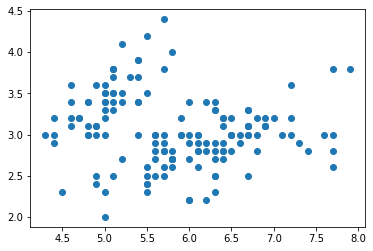

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
#elbow method
d=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='random',n_init=10)
    kmeans.fit(X)
    d.append(kmeans.inertia_)


C:\Users\najaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\najaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\najaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\najaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

<function matplotlib.pyplot.show(close=None, block=None)>

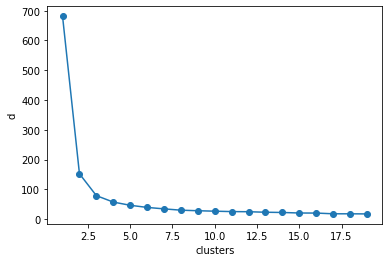

In [5]:
x = [ i for i in range(1,20)]
plt.plot(x,d,marker = 'o')
plt.xlabel('clusters')
plt.ylabel('d')
plt.show
#K should be 10 in this case

In [6]:
# USING SKLEARN
clf=KMeans(n_clusters=3)
clf.fit(data_iris.data)

C:\Users\najaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\najaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
l=clf.labels_
cc=clf.cluster_centers_
print("labels",l)
print("cluster_centers",cc)

labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
cluster_centers [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 1.0, 'CLUSTERS')

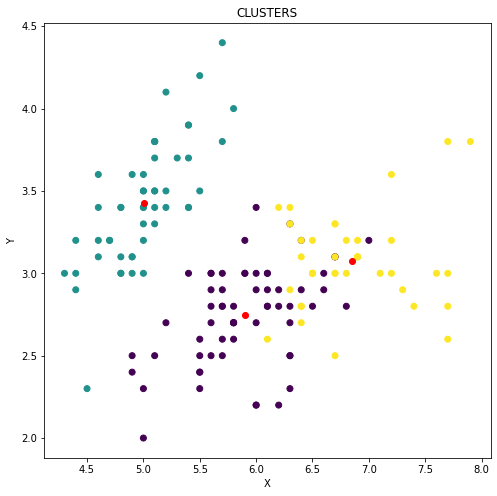

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(x=data_iris.data[:,0], y=data_iris.data[:,1], c=l )
plt.scatter(x=cc[:, 0], y=cc[:, 1], c=['red'])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("CLUSTERS")

In [9]:
#from scratch
def k_means(x,k):
    l=len(x)
    centers = x[random.choices(np.arange(0,l),k=3)]
    distance = np.zeros((l,k))
    cp = np.zeros(l)
    og = cp.copy()
    while True:
        for i in range(k):
            distance[:,i] = ((X- centers[i])**2).sum(axis = 1)**0.5
            cp=(np.argmin(distance, axis = 1))
            centers[i,:] = x[cp==i].mean(axis = 0)
        if all(cp==og):
            break
        return (f"labels",cp, f"centers of the clusters",centers)

In [10]:
k_means(X,3)

('labels',
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1], dtype=int64),
 'centers of the clusters',
 array([[5.8       , 2.6       , 4.        , 1.2       ],
        [6.1       , 2.9       , 4.7       , 1.4       ],
        [6.80769231, 3.05128205, 5.72820513, 2.08974359]]))

C:\Users\najaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


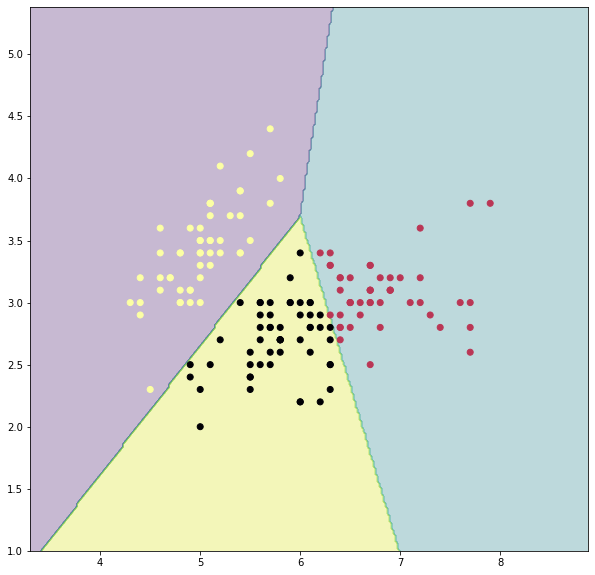

In [11]:
#decision boundary
plt.figure(figsize = (10,10))
a= np.arange(start=min(X[:,0])-1,stop=max(X[:,0])+1,step=0.02)
b= np.arange(start=min(X[:,1])-1,stop=max(X[:,1])+1,step=0.02)
xx,yy=np.meshgrid(a,b)
arr=np.array([xx.ravel(),yy.ravel()]).T #covert to 1d array
kmeans = KMeans(n_clusters=3,init='random',n_init=10)
kmeans.fit(X[:,:2])
y_pred = kmeans.predict(X[:,:2])
l=kmeans.predict(arr)
plt.contourf(xx,yy,l.reshape(xx.shape),alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='inferno_r')

# KMEANS ON MNIST DATASET

In [12]:
df=pd.read_csv("mnist_train.csv")
dt= pd.read_csv("mnist_test.csv")
x1_train=df.drop("label",axis=1)
y1_train=df["label"]
x1_test=dt.drop("label",axis=1)
y1_test=dt["label"]

In [13]:
x1_train.shape, x1_test.shape, y1_train.shape,y1_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [14]:
scaler = StandardScaler()
scaler.fit(x1_train)
x_train = scaler.transform(x1_train)
features = PCA(n_components = 2)
features.fit(x_train)
x = features.transform(x_train)

In [15]:
#USING SKLEARN
clf1=KMeans(n_clusters=10)
clf1.fit(x)

C:\Users\najaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [16]:
l1=clf1.labels_
cc1=clf1.cluster_centers_
print("labels",l1)
print("cluster_centers",cc1)

labels [6 1 2 ... 6 1 6]
cluster_centers [[-4.26852863  3.52286972]
 [ 4.46049443 -6.76092372]
 [-0.1660543   8.10463768]
 [-6.43680965 -1.36510441]
 [ 6.58592638  2.03777913]
 [17.40369903  2.96049708]
 [-2.15576041 -5.28252412]
 [ 7.37466149 11.75095633]
 [ 0.23744026  0.03783668]
 [13.80597838 -8.25626259]]


In [17]:
#FROM SCRATCH
def k_means(x,k):
    l=len(x)
    centers = x[random.choices(np.arange(0,l),k=10)]
    distance = np.zeros((l,k))
    cp = np.zeros(l)
    og = cp.copy()
    while True:
        for i in range(k):
            distance[:,i] = ((x- centers[i])**2).sum(axis = 1)**0.5
            cp=(np.argmin(distance, axis = 1))
            centers[i,:] = x[cp==i].mean(axis = 0)
        plt.figure(figsize = (10,10))    
        plt.scatter(centers[:,0],centers[:,1], marker= "o")
        plt.show()
        if all(cp==og):
            break
        return (cp,f"centers of the clusters",centers)

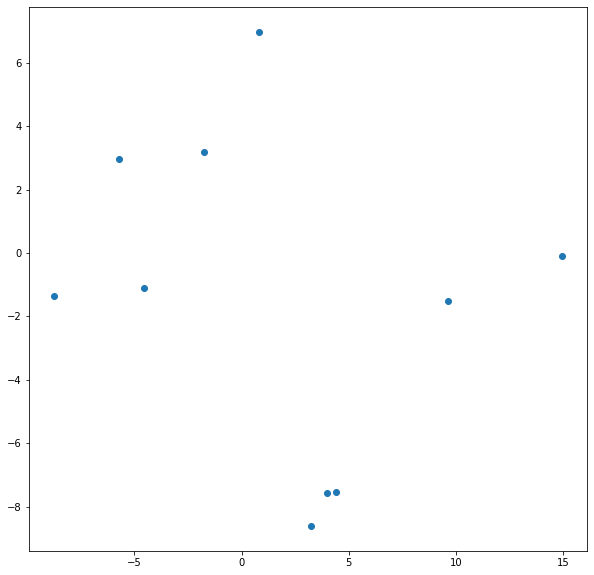

(array([1, 7, 2, ..., 1, 4, 8], dtype=int64),
 'centers of the clusters',
 array([[-8.74047631, -1.3394144 ],
        [-4.56537664, -1.11435468],
        [ 0.82002608,  6.96743243],
        [ 9.62672528, -1.49804732],
        [ 3.98570554, -7.57674728],
        [-1.74709719,  3.19407425],
        [14.93420119, -0.08496022],
        [ 4.42432609, -7.54461999],
        [ 3.26037222, -8.60489606],
        [-5.74166994,  2.97345489]]))

In [18]:
k_means(x,k=10)

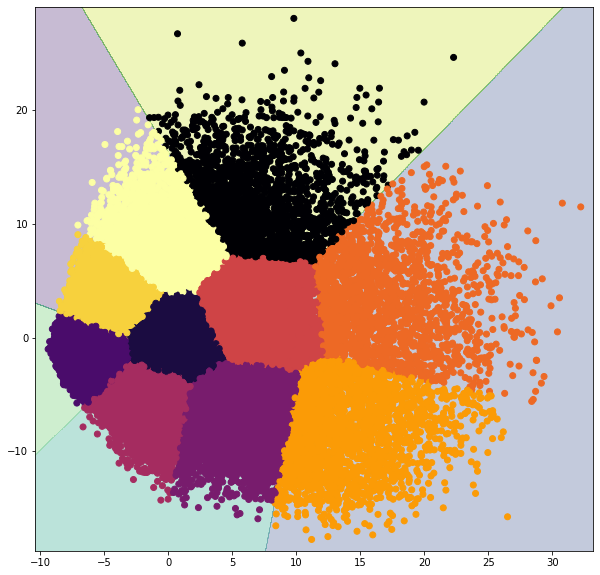

In [19]:
plt.figure(figsize = (10,10))
a= np.arange(start=min(x[:,0])-1,stop=max(x[:,0])+1,step=0.02)
b= np.arange(start=min(x[:,1])-1,stop=max(x[:,1])+1,step=0.02)
xx,yy=np.meshgrid(a,b)
arr=np.array([xx.ravel(),yy.ravel()]).T #covert to 1d array
kmeans = KMeans(n_clusters=10,init='random',n_init=10)
kmeans.fit(x[:,:2])
y_pred = kmeans.predict(x[:,:2])
l=kmeans.predict(arr)
plt.contourf(xx,yy,l.reshape(xx.shape),alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y_pred,cmap='inferno_r')

In [ ]:
d1=[]
for i in range(1,50):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10)
    kmeans.fit(x1_train)
    d1.append(kmeans.inertia_)
x = [ i for i in range(1,50)]
plt.plot(x1_train,d1,marker = 'o')
plt.xlabel('clusters')
plt.ylabel('d')
plt.show